This tutorial is dedicated to learning how visualize data using the library  **ggplot2**. 

We have already seen several built-in functions in R for making plots, but ggplot2 provides a more elegant and versatile way of doing this. It implements a grammar of graphics, i.e. a coherent system for describing and building graphs.

# Loading ggplot2

ggplot2 is part of **tidyverse**, a collection of core packages that have become the standard for modelling, transforming and visualizing data in R. 

We'll learn a little bit more about this in the following tutorial, but for now let's just load the package, in the same way as we learned before, that is, using the function `library`.

In [2]:
library(tidyverse)

Registered S3 methods overwritten by 'tibble':
  method     from  
  format.tbl pillar
  print.tbl  pillar

Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang

Registered S3 method overwritten by 'rvest':
  method            from
  read_xml.response xml2

── Attaching packages ────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────── tidyverse 1.2.1 ──

✔ ggplot2 3.1.1       ✔ purrr   0.3.2  
✔ tibble  2.1.1       ✔ dplyr   0.8.0.1
✔ tidyr   0.8.3       ✔ stringr 1.4.0  
✔ readr   1.3.1       ✔ forcats 0.4.0  

── Conflicts ───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats

# First steps

In order to learn practicing, let's load the following dataset:

In [3]:
sat.dat<-read.csv("https://vincentarelbundock.github.io/Rdatasets/csv/psych/sat.act.csv")

These data correspond to the self reported scores on the SAT Verbal, SAT Quantitative and ACT, and were collected as part of the Synthetic Aperture Personality Assessment (SAPA) web based personality assessment project. Age, gender, and education are also reported.

In [4]:
head(sat.dat)

X,gender,education,age,ACT,SATV,SATQ
29442,2,3,19,24,500,500
29457,2,3,23,35,600,500
29498,2,3,20,21,480,470
29503,1,4,27,26,550,520
29504,1,2,33,31,600,550
29518,1,5,26,28,640,640


In [5]:
sat.dat$gender<- as.factor(sat.dat$gender)

In [6]:
dim(sat.dat)

[1] 700   7

## Basic Syntax

To build a ggplot, we will use the following basic template that can be used for different types of plots:


> `ggplot(data = <DATA>, mapping = aes(<MAPPINGS>)) +  <GEOM_FUNCTION>()`

or 

> `ggplot(data = <DATA>) +  <GEOM_FUNCTION>(mapping = aes(<MAPPINGS>))`

In a nutshell:

- One begins a plot with the function `ggplot`, which creates a coordinate system where you can add layers to. 
- The first argument of `ggplot` is the dataset to use in the graph. 
- The graph can be then completed by adding one or more layers to `ggplot` using a geom function.
- Each geom function in **ggplot2** takes a mapping argument. This defines how variables in your dataset are mapped to visual properties. The mapping argument is always paired with the function `aes`, and the x and y arguments of aes() specify which variables to map to the x- and y-axes.
- **ggplot2** comes with many geom functions that each add a different type of layer to a plot

A list of the geom_functions available can be found https://ggplot2.tidyverse.org/reference/, but for now let's create a graph that plots ACT scores against SAT verbal:

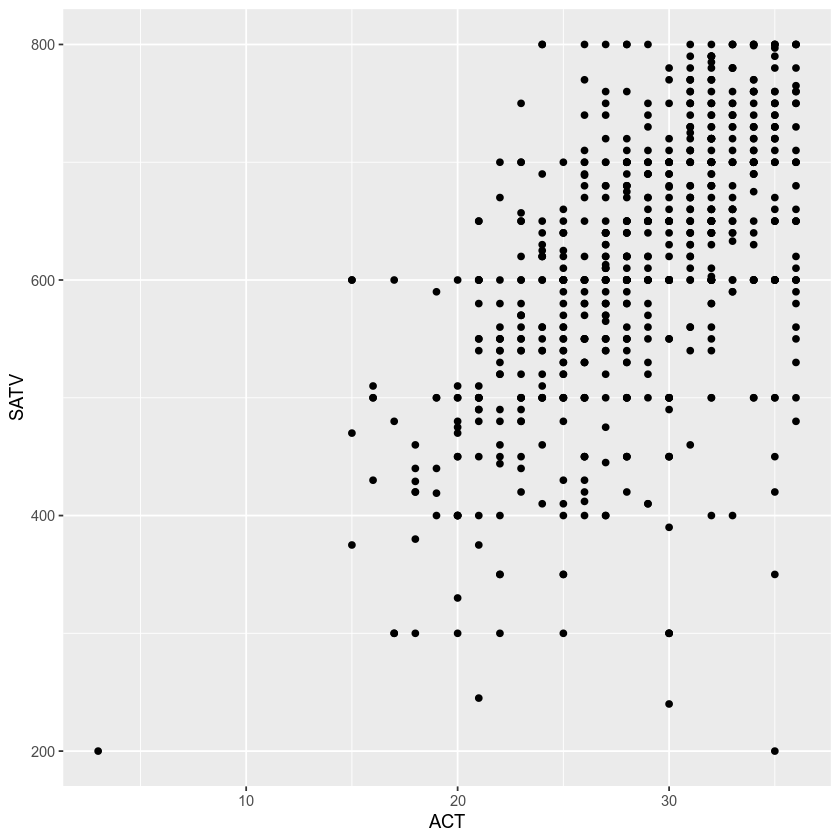

In [7]:
ggplot(data = sat.dat, mapping = aes(x=ACT, y=SATV)) + geom_point()

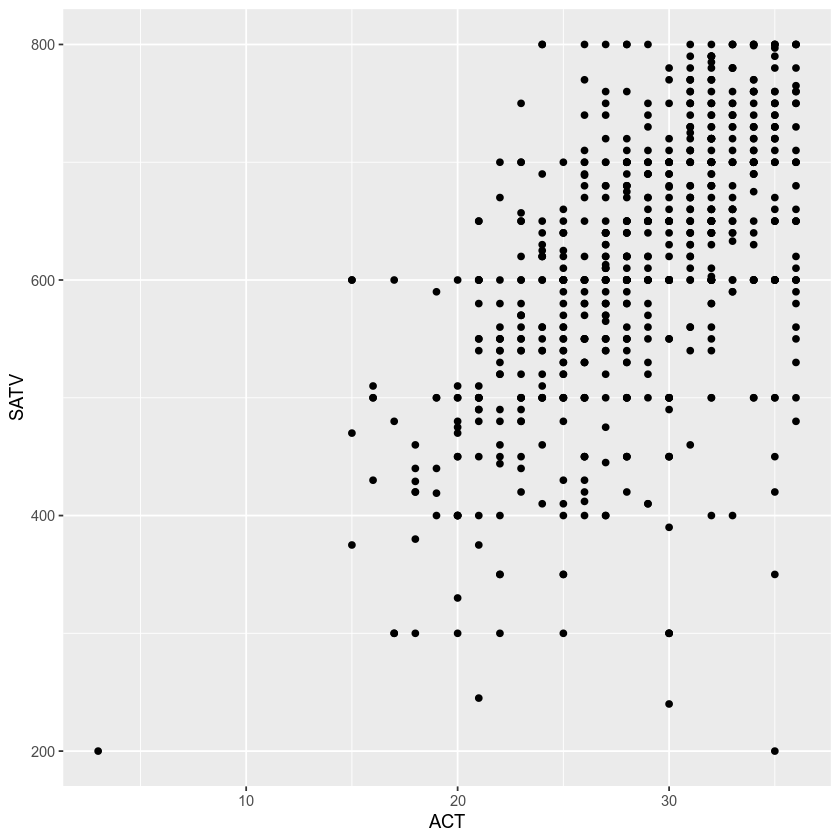

In [8]:
ggplot(data = sat.dat) + geom_point( mapping = aes(x=ACT, y=SATV))

This kind of plots that represents with points one continuous variable against another continuous variable are called **SCATTERPLOTS**.

## Aesthetic Mappings

In **ggplot2**, each aesthetic is a mapping between a visual cue and a variable. Examples include:

- Position (i.e., on the x and y axes)
- Color (“outside” color)
- Fill (“inside” color)
- Shape (of points)
- Alpha (Transparency)
- Line type
- Size

Each type of geom accepts ONLY a subset of all aesthetics (You can always check the geom help pages to see what mappings each geom accepts).

Let's continue with our example dataset.

**Position**

This is just x and y position of the points, which will give us the same answer as above

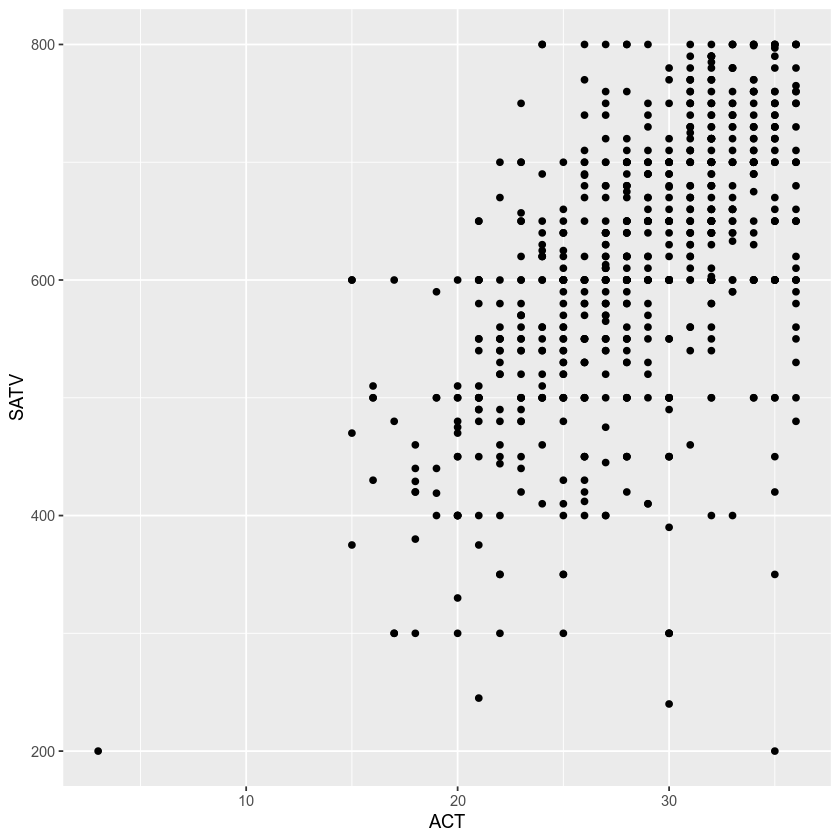

In [9]:
ggplot(data = sat.dat) + geom_point(mapping = aes(x=ACT, y=SATV))

**Position + color**

Let's say we want to color points differently for gender. We can do this very easily by passing this variable to the color argument in `aes`:

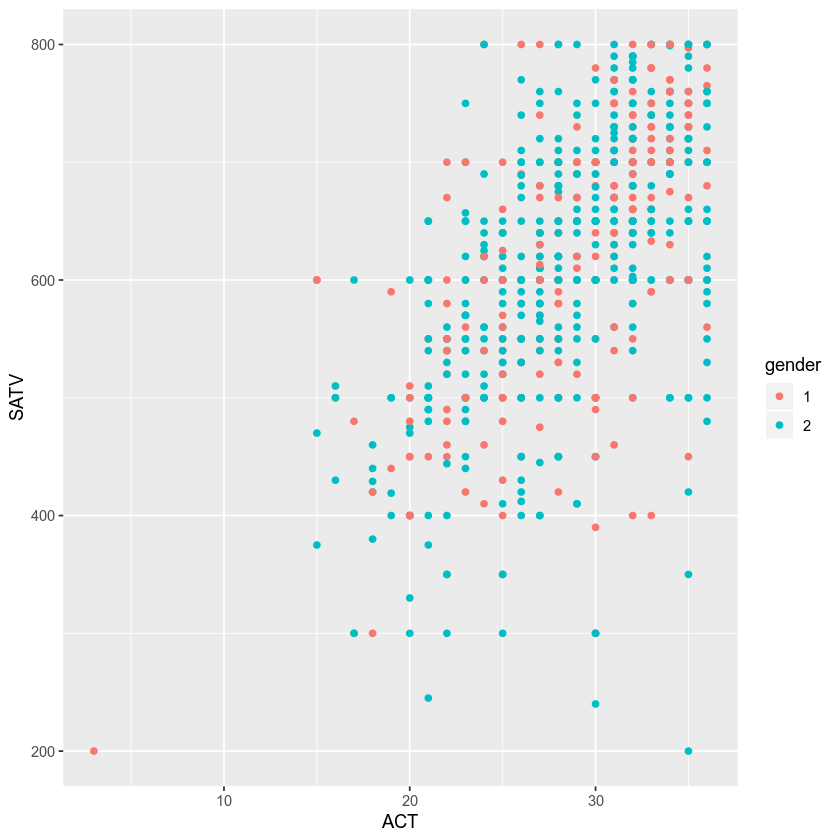

In [10]:
ggplot(data = sat.dat) + geom_point(mapping = aes(x=ACT, y=SATV, color=gender))

<div class="alert alert-info"> <b>Practice</b> try the same as above, but color the graph using education instead of gender. Why is it not that informative?</div>

**Position + size**

Let's say that now we want points to have a different size according to the people's age. We can do this very easily by passing this variable to the size argument in `aes`:

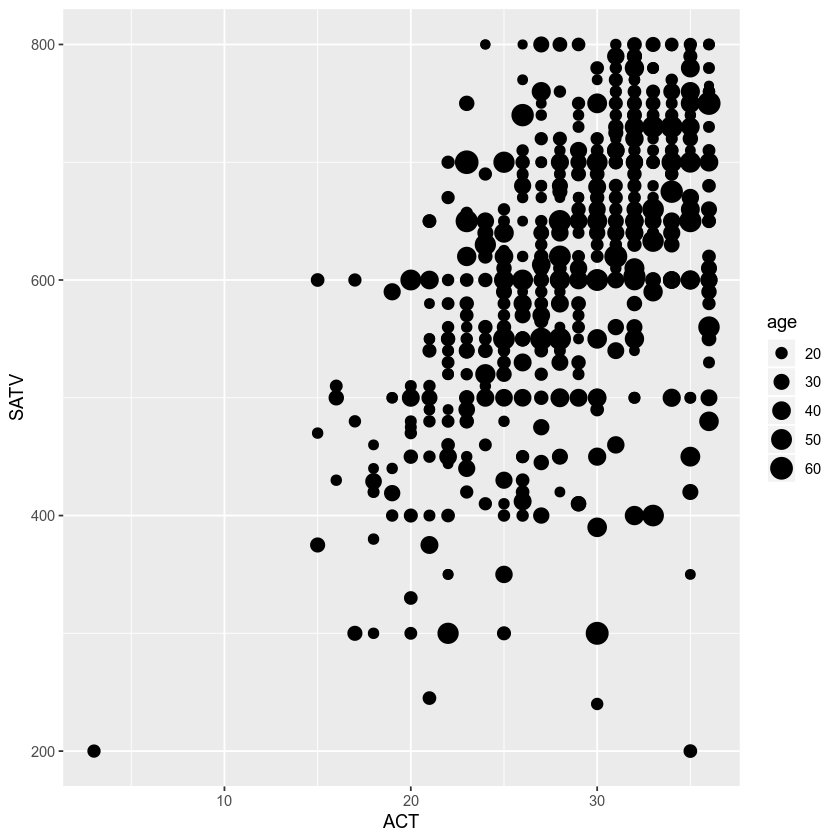

In [11]:
ggplot(data = sat.dat) + geom_point(mapping = aes(x=ACT, y=SATV, size=age))

**Position + color + size**

We can even incorporate multiple aesthetic conditions together:

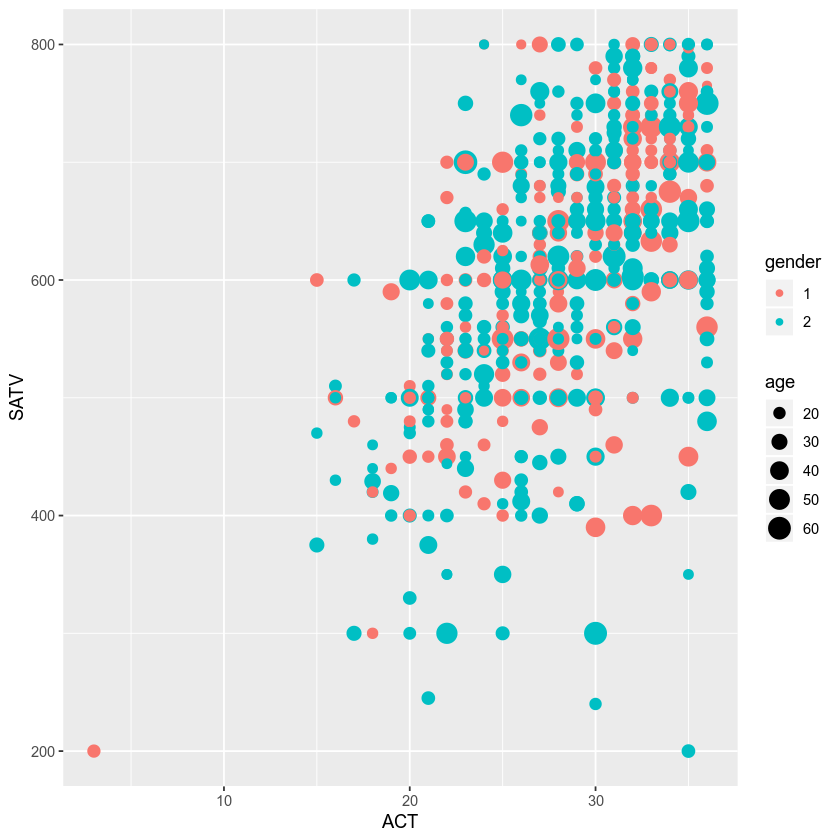

In [17]:
ggplot(data = sat.dat) + geom_point(mapping = aes(x=ACT, y=SATV, size=age, color=gender))

<div class="alert alert-info"> <b>Practice</b> Do the same, but using "shape" instead of "color" changing according to gender </div>

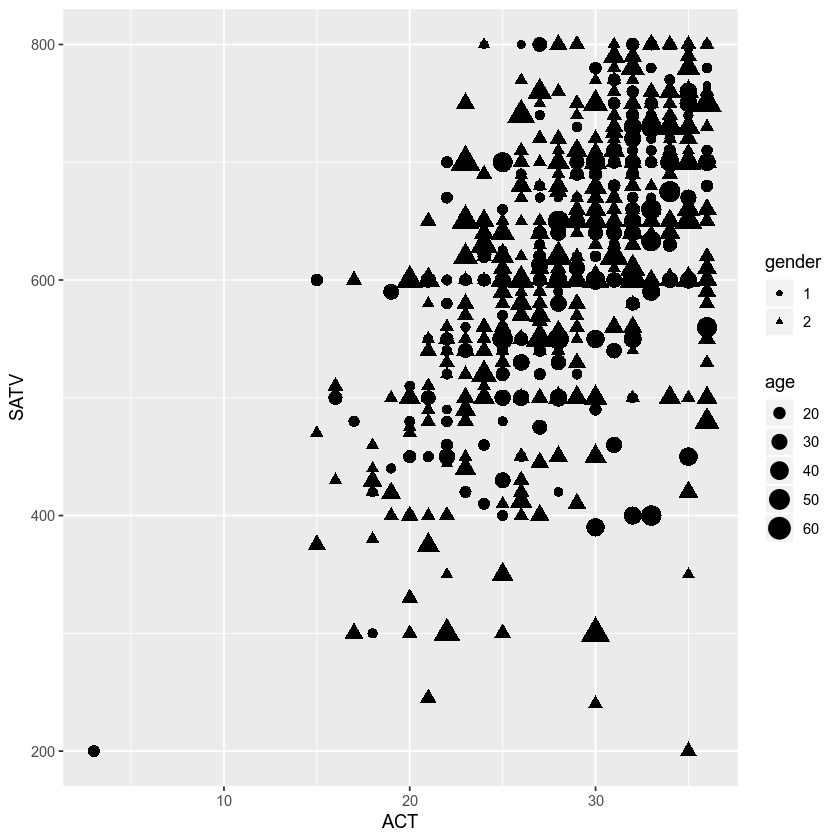

In [18]:
ggplot(data = sat.dat) + geom_point(mapping = aes(x=ACT, y=SATV, size=age, shape=gender))

### Aesthetic Mapping vs. Assignment

**Important**: Variables are mapped to aesthetics with the function `aes`. However, fixed visual cues can also be set to particular values, although this must be done OUTSIDE `aes`:

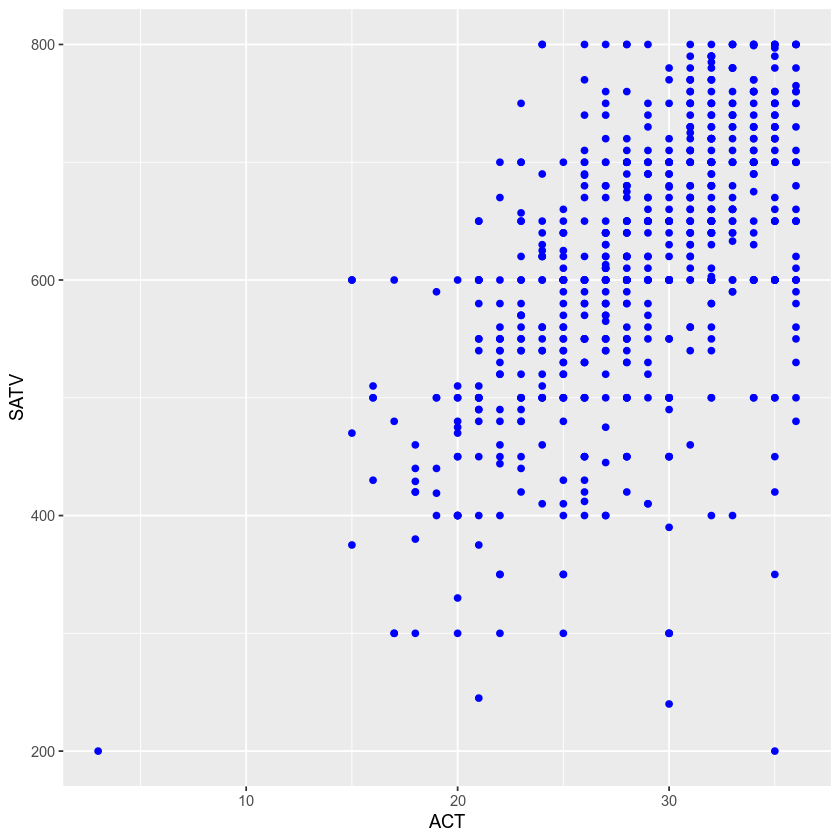

In [66]:
# Here setting points to a fixed blue color
ggplot(data = sat.dat) + geom_point(mapping = aes(x=ACT, y=SATV), color='blue')

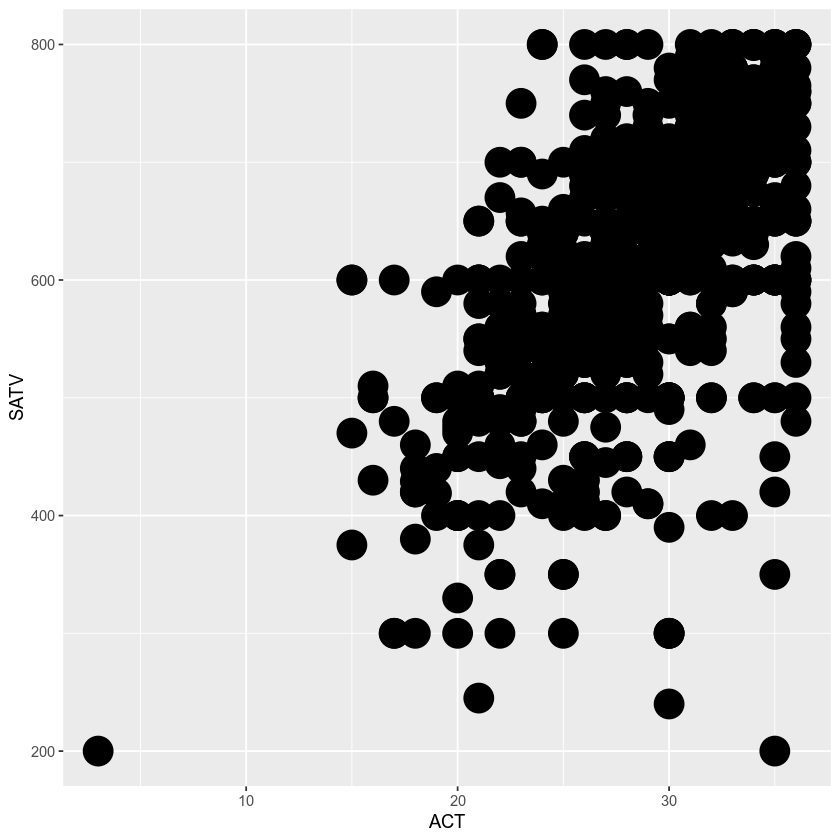

In [73]:
# Here changing all points size
ggplot(data = sat.dat) + geom_point(mapping = aes(x=ACT, y=SATV), size=8)

# Scales

Before, when we passed the variables to the aesthetics, the visual properties of these were being selected automatically by the machine. We could have more control of this by setting their scales.

Scales are modified with a series of functions using 

> `scale_<aesthetic>_<type>`

The following arguments are common to most scales in ggplot2:

- name: the first argument specifies the axis or legend title
- limits: the minimum and maximum of the scale
- breaks: the points along the scale where labels should appear
- labels: the text that appear at each break

    
Specific scale functions may have additional arguments. You can (and should) check the documentation of each function to know which arguments can be passed

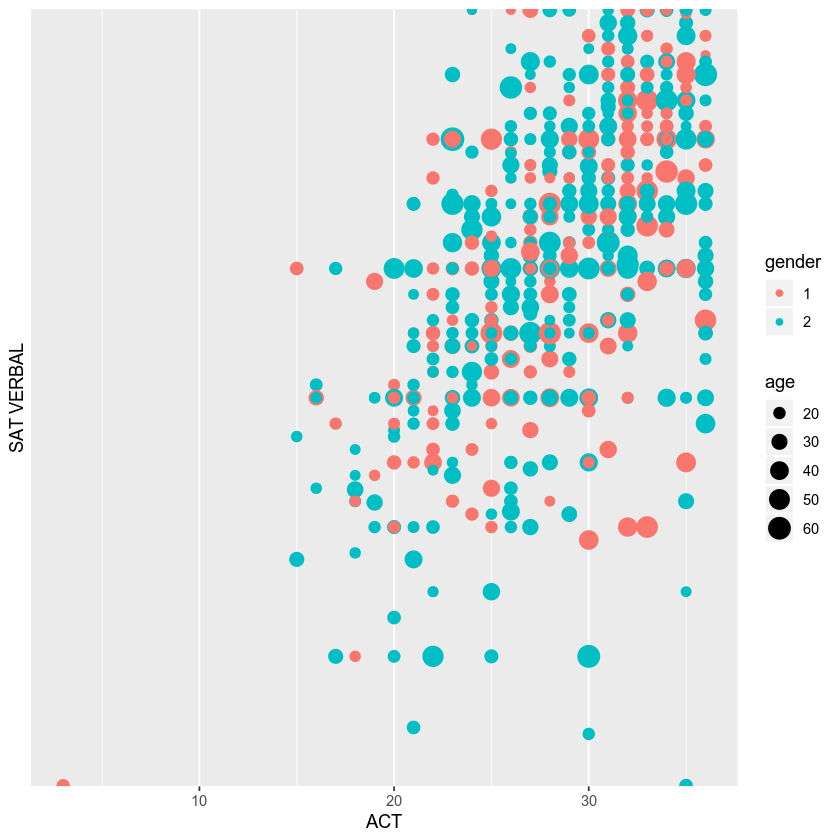

In [95]:
ggplot(data = sat.dat) + 
geom_point(mapping = aes(x=ACT, y=SATV, size=age, color=gender)) +
scale_y_discrete(name = "SAT VERBAL")

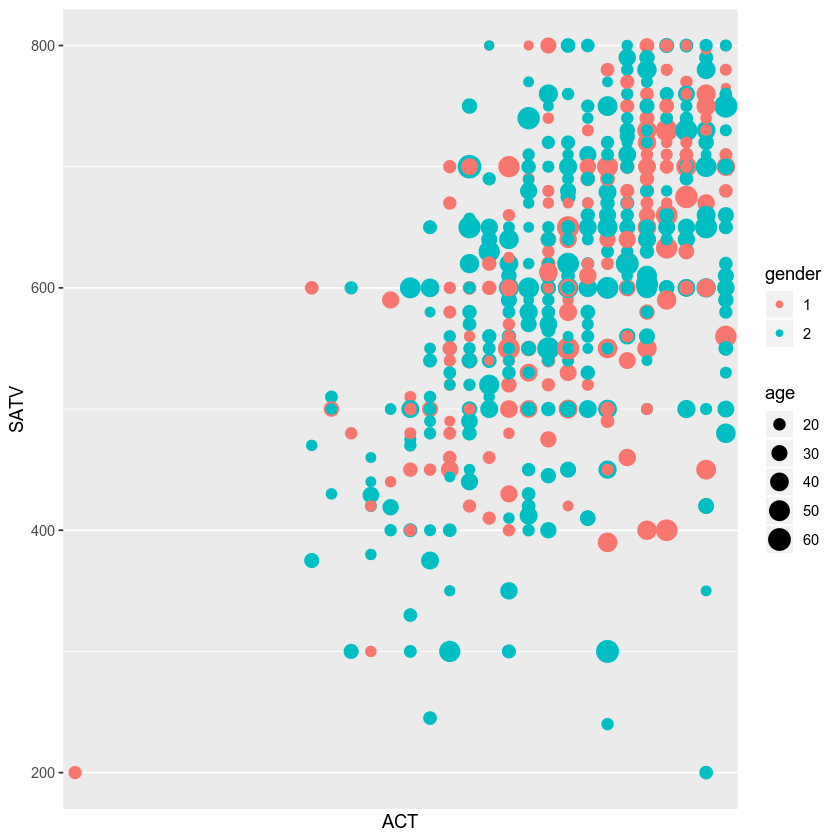

In [97]:
ggplot(data = sat.dat) + 
geom_point(mapping = aes(x=ACT, y=SATV, size=age, color=gender)) +
scale_x_discrete(name = "ACT")

Now let’s modify the breaks and labels for the x axis and color scales:

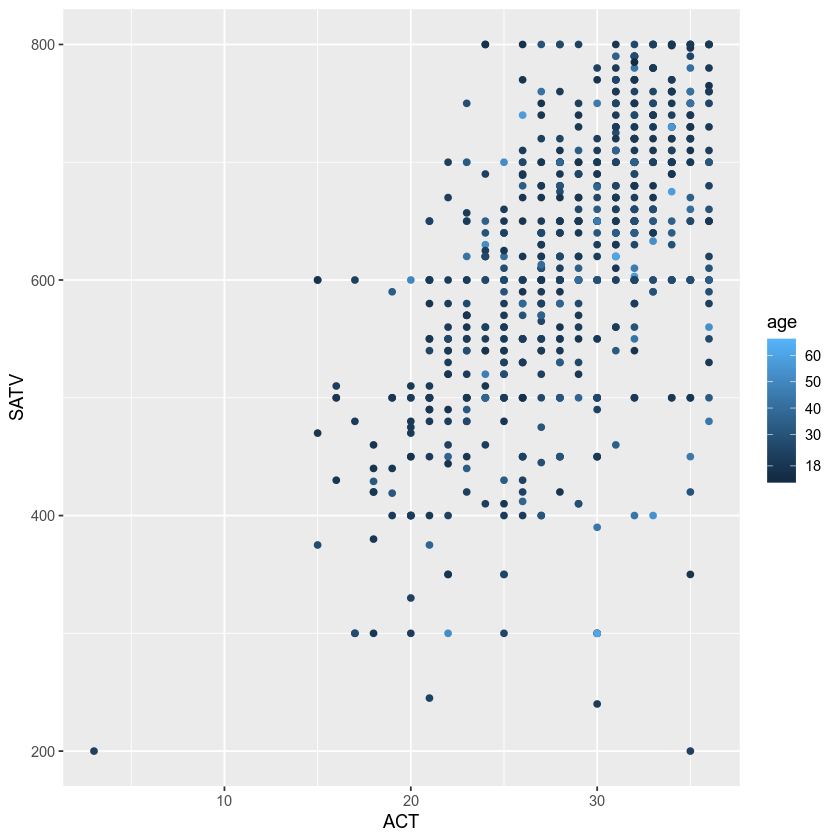

In [111]:
ggplot(data = sat.dat) + 
geom_point(mapping = aes(x=ACT, y=SATV, color=age)) +  
scale_color_continuous(breaks = c(18, 30, 40, 50, 60))

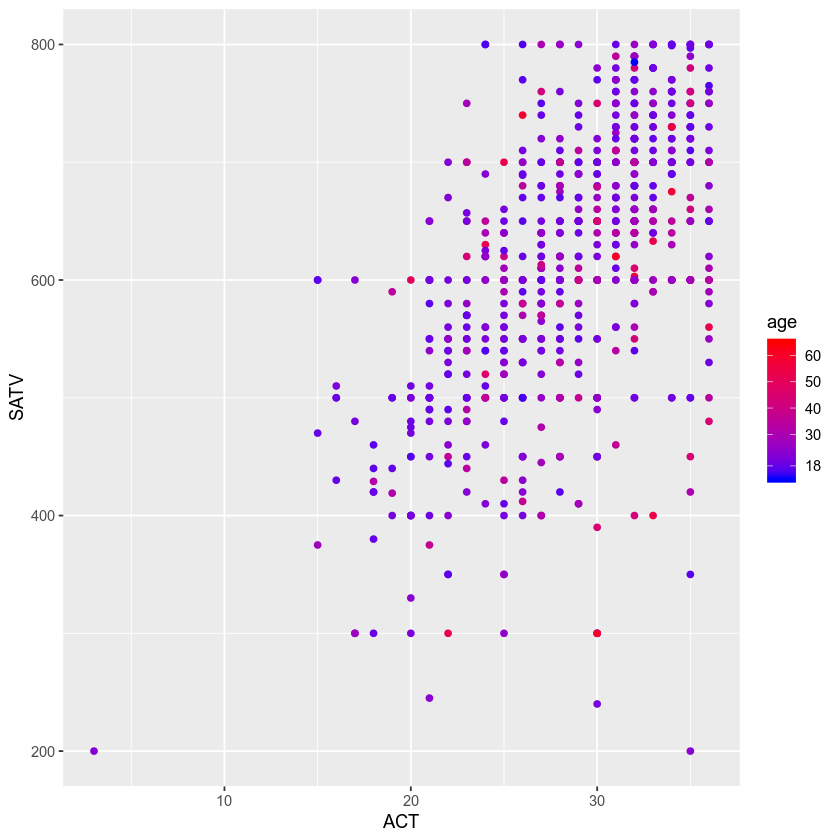

In [117]:
ggplot(data = sat.dat) + 
geom_point(mapping = aes(x=ACT, y=SATV, color=age)) +  
scale_color_continuous(breaks = c(18, 30, 40, 50, 60), low='blue', high='red')

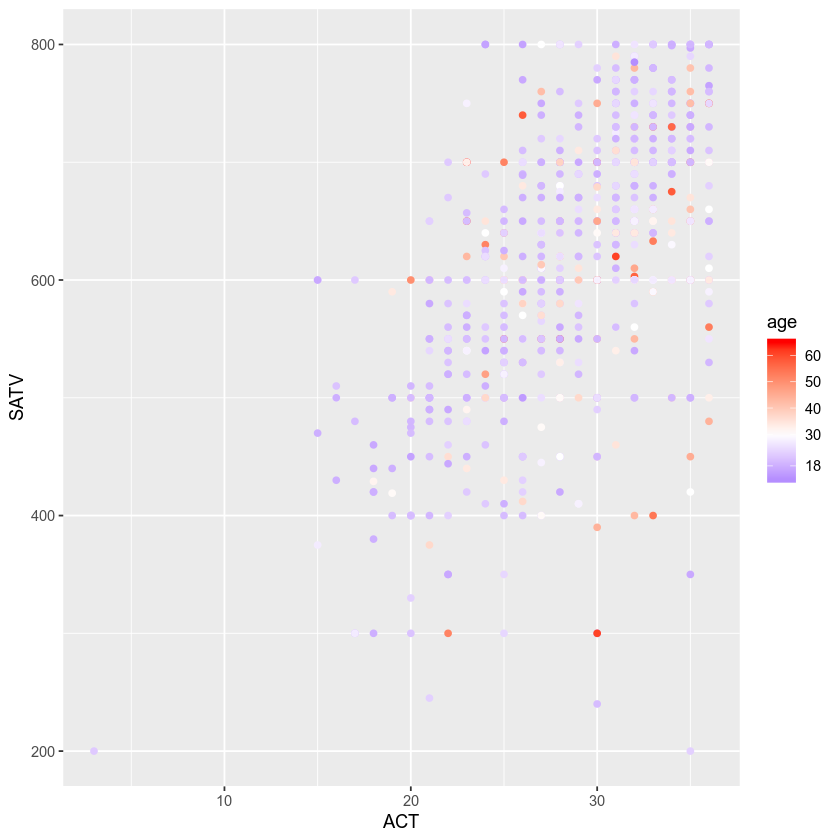

In [121]:
ggplot(data = sat.dat) + 
geom_point(mapping = aes(x=ACT, y=SATV, color=age)) +  
scale_color_gradient2(breaks = c(18, 30, 40, 50, 60),
                      low='blue', high='red', mid = 'white', midpoint=30)

More scales in https://ggplot2.tidyverse.org/reference/#scales

# Facets

An interesting way to graph the data, particularly with categorical variables, is to split your plot into
facets, i.e. subplots that each display one subset of the data. You may use for this `facet_grid` or `facet_wrap`, for example. What's the difference between them? Let's have a look at the help function for that, something which is always useful :-)

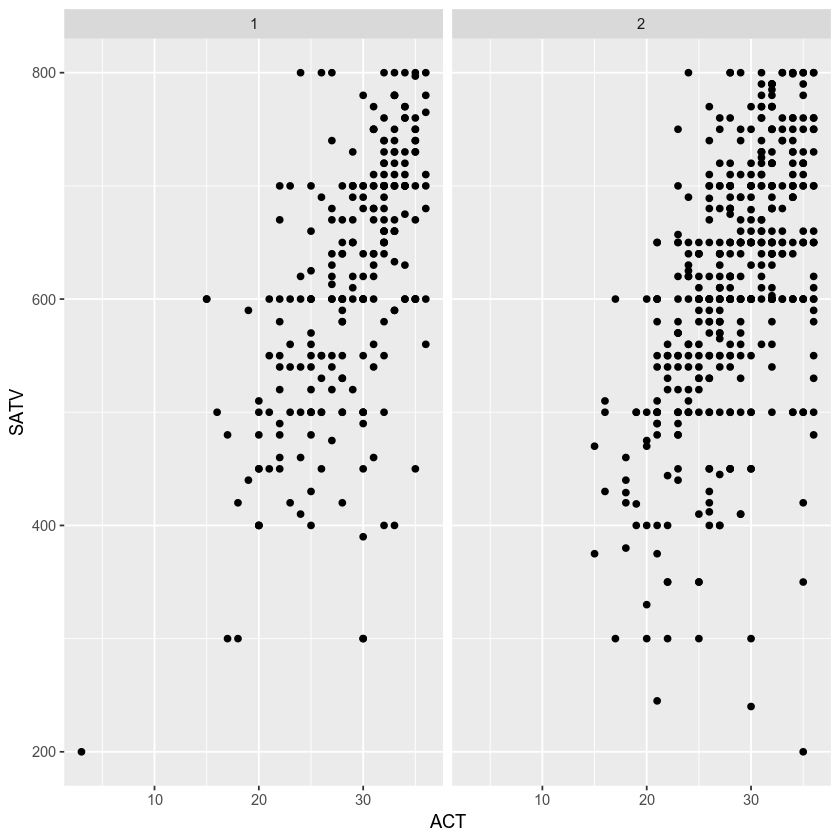

In [122]:
ggplot(data = sat.dat) + geom_point(mapping = aes(x=ACT, y=SATV)) + facet_wrap(~gender)

To facet your plot on the combination of two variables, add
facet_grid() to your plot call. The first argument of facet_grid()
is also a formula. This time the formula should contain two variable
names separated by a ~ :

In [123]:
ggplot(data = sat.dat) + geom_point(mapping = aes(x=ACT, y=SATV)) + facet_grid(education~gender)

If you prefer to not facet in the rows or columns dimension, use a . instead of a variable name.

In [124]:
ggplot(data = sat.dat) + geom_point(mapping = aes(x=ACT, y=SATV)) + facet_grid(.~gender)

In [65]:
ggplot(data = sat.dat) + geom_point(mapping = aes(x=ACT, y=SATV)) + facet_grid(education~.)

# Geometric Objects

A geom is the geometrical object that a plot uses to represent data. We have already used `geom_point` to represent scatterplots, but there are many other geometries and each will give a different kind of plot. For example,  `geom_bar` gives a bar chart,  `geom_line` yields line charts, `geom_boxplot` yields a boxplot, and so on. The list of available geometries can be found in https://ggplot2.tidyverse.org/reference/#geoms

One thing that we did not mention before is that you can  use different geometries in the same plot. Following with our example, let's make our scatterplot and show also line that fitted these data. We can do this using the function `geom_smooth`

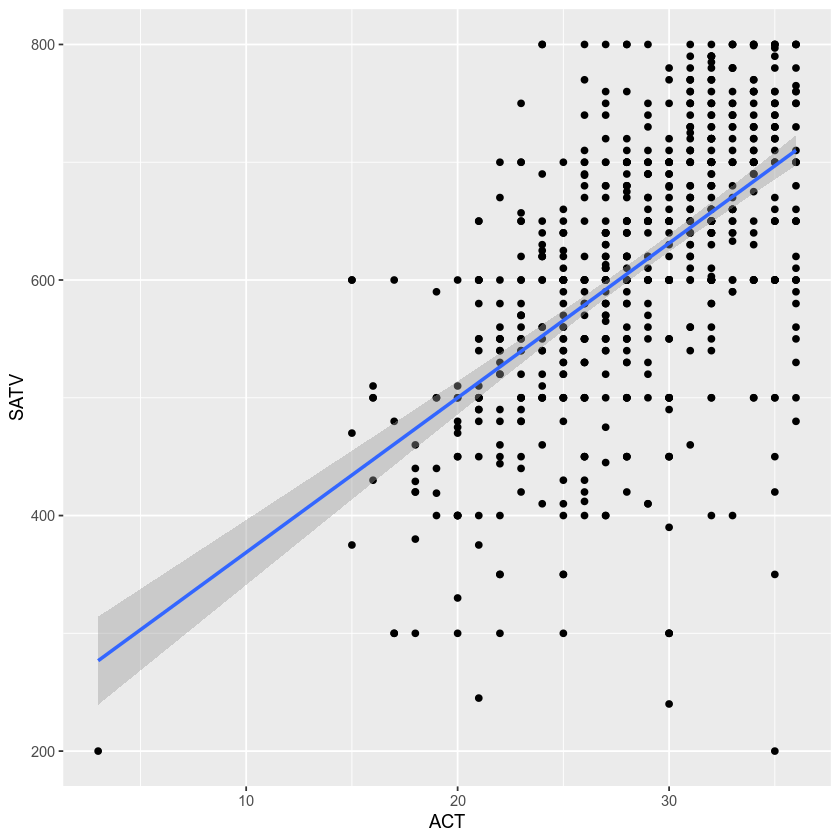

In [136]:
ggplot(data = sat.dat) + 
geom_point(mapping = aes(x=ACT, y=SATV)) + 
geom_smooth(mapping = aes(x=ACT, y=SATV), method='lm')

**Important**: This, introduces some duplication in our code. Imagine that we wanted to change the x-axis to depict a different variable. We would need to change that in both `geom_point` and `geom_smooth`. This can be quite annoying! In order to circumvent this, we can just pass the mappings to a ggplot (the first function) and  **ggplot2** will treat these as global mappings that apply to every single geometry in the graph.

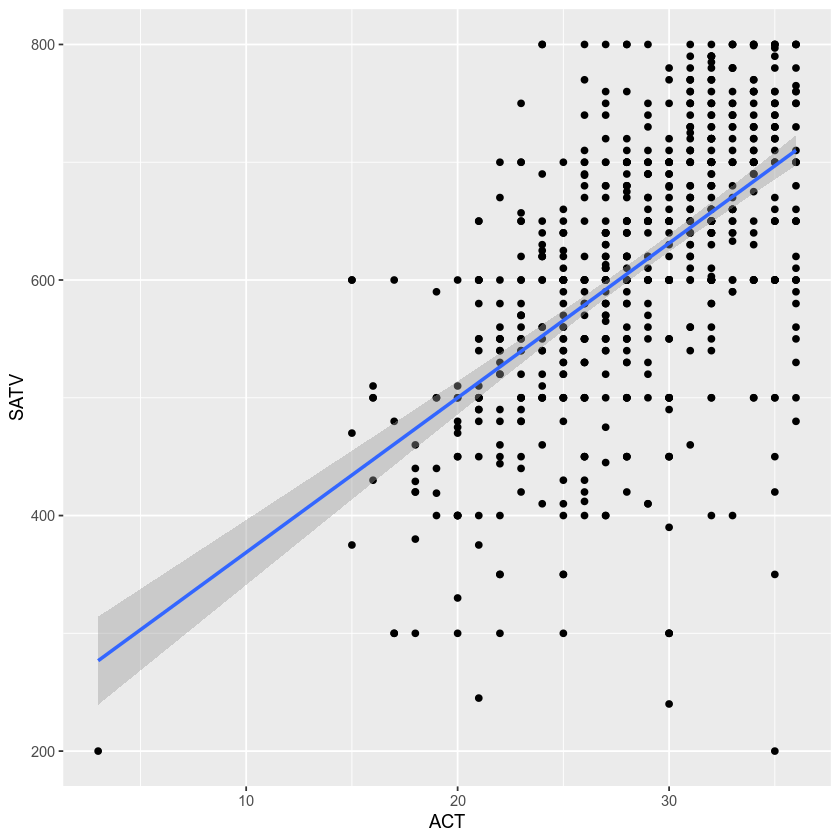

In [140]:
ggplot(data = sat.dat, aes(x=ACT, y=SATV)) + 
geom_point()  + 
geom_smooth(method='lm')

You can alway still use mappings in each geometry, for which ggplot2 will treat them as local mappings for that specific layer. It will use these mappings to extend or overwrite the global mappings for that layer only. This makes it possible to display different aesthetics in different layers:

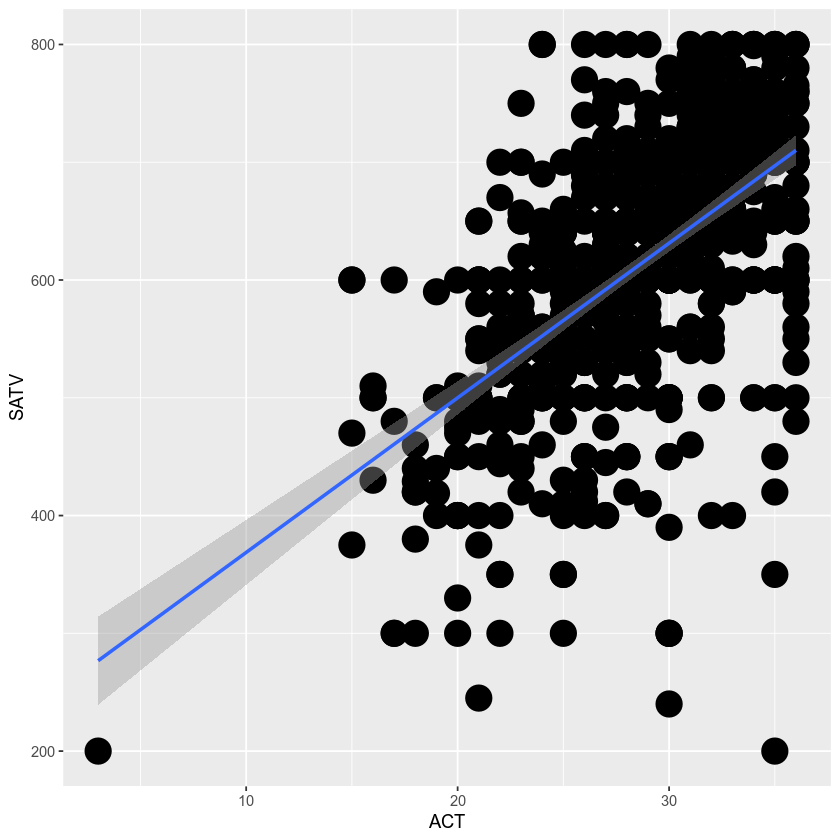

In [143]:
ggplot(data = sat.dat, aes(x=ACT, y=SATV)) + 
geom_point(size=7)  + 
geom_smooth(method='lm')

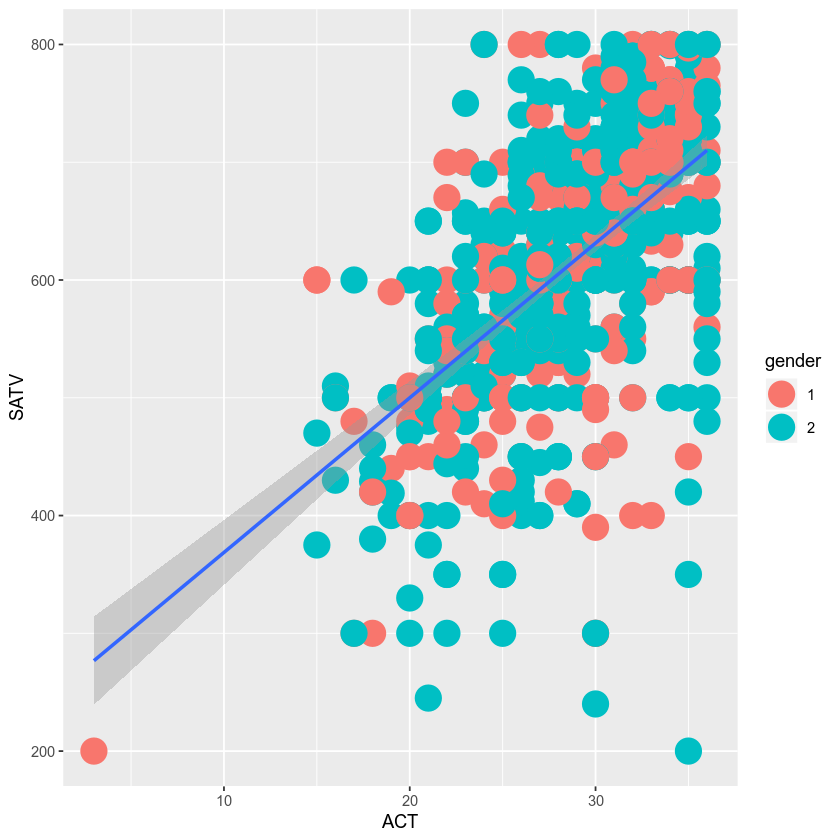

In [147]:
ggplot(data = sat.dat, aes(x=ACT, y=SATV)) + 
geom_point(size=7, aes(color=gender))  + 
geom_smooth(method='lm')

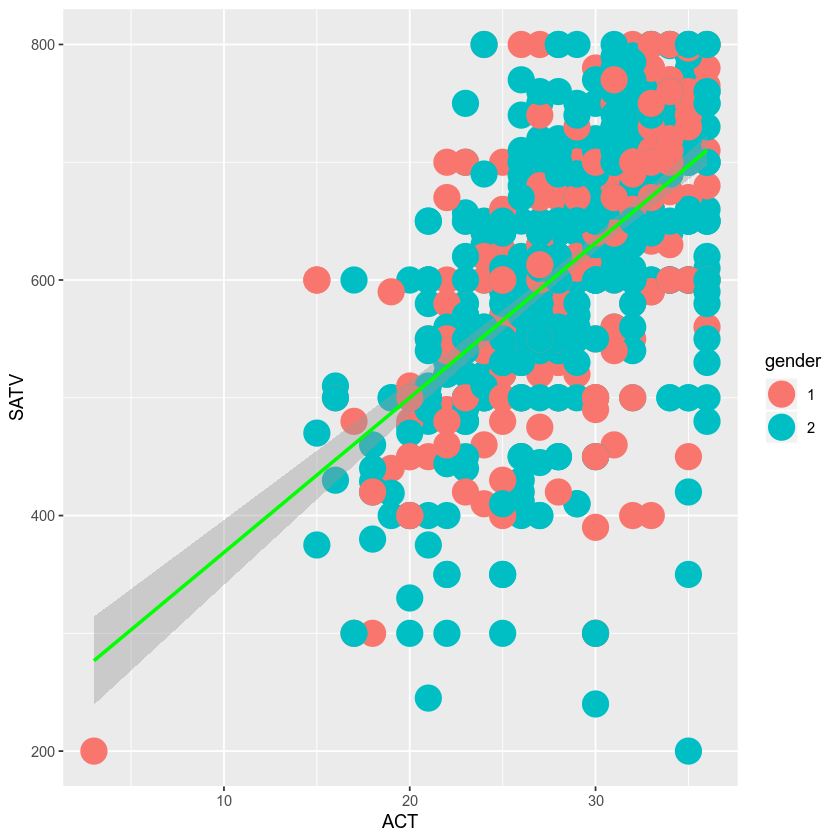

In [148]:
ggplot(data = sat.dat, aes(x=ACT, y=SATV)) + 
geom_point(size=7, aes(color=gender))  + 
geom_smooth(method='lm', color='green')

# BUILDING YOUR PLOT IN A SERIAL WAY

Finally, one of the nicest things of ggplot and tidyverse in general is that you can save your results in variables and build on top of that.

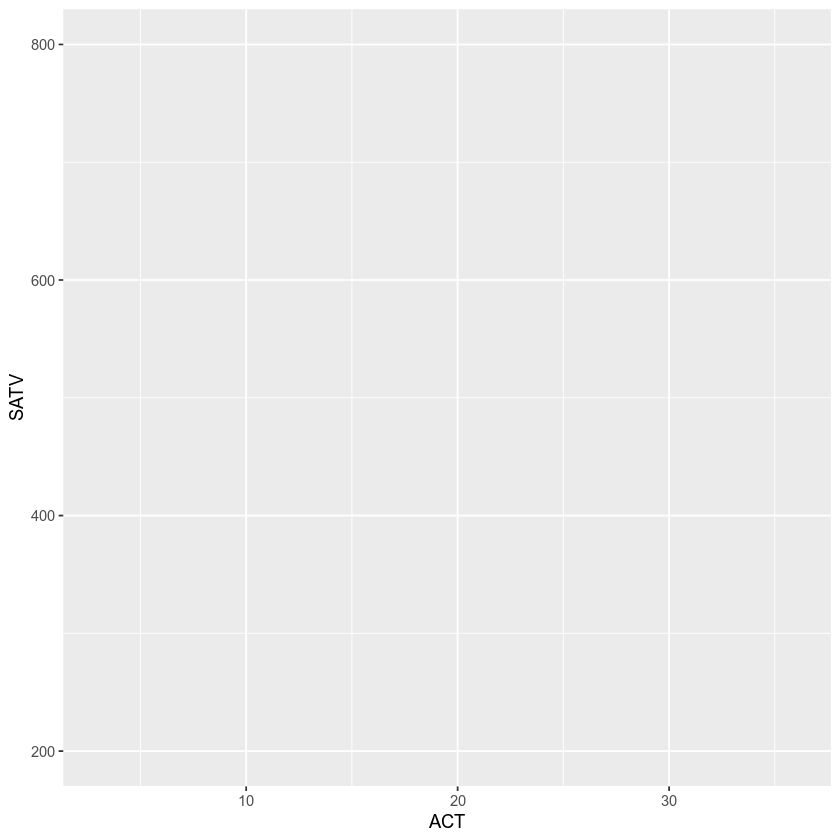

In [150]:
my.plot<-ggplot(data = sat.dat, mapping = aes(x=ACT, y=SATV))
my.plot

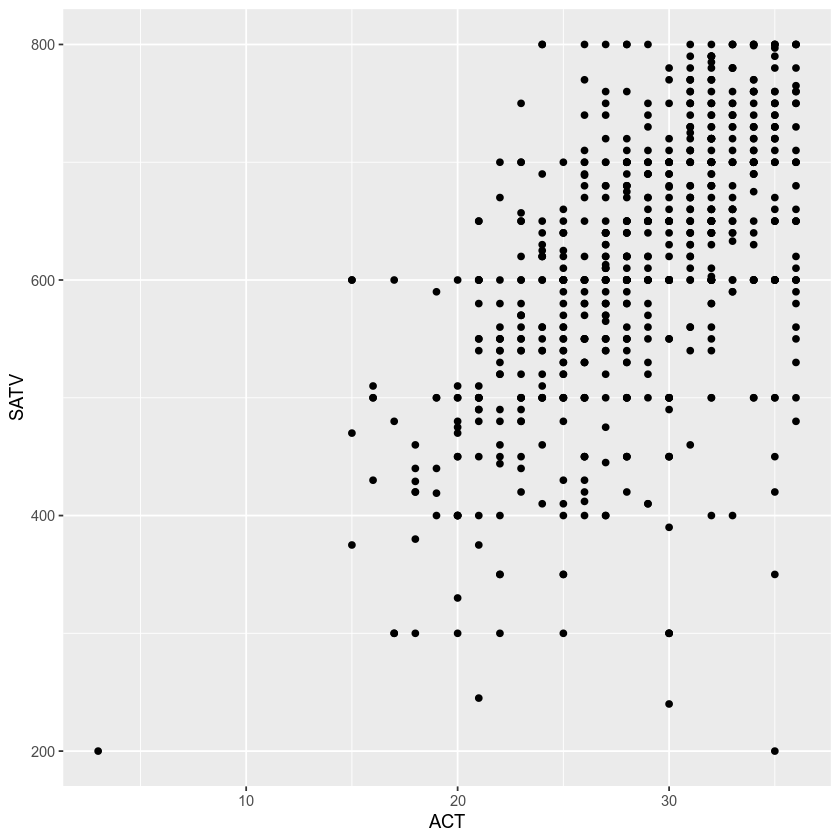

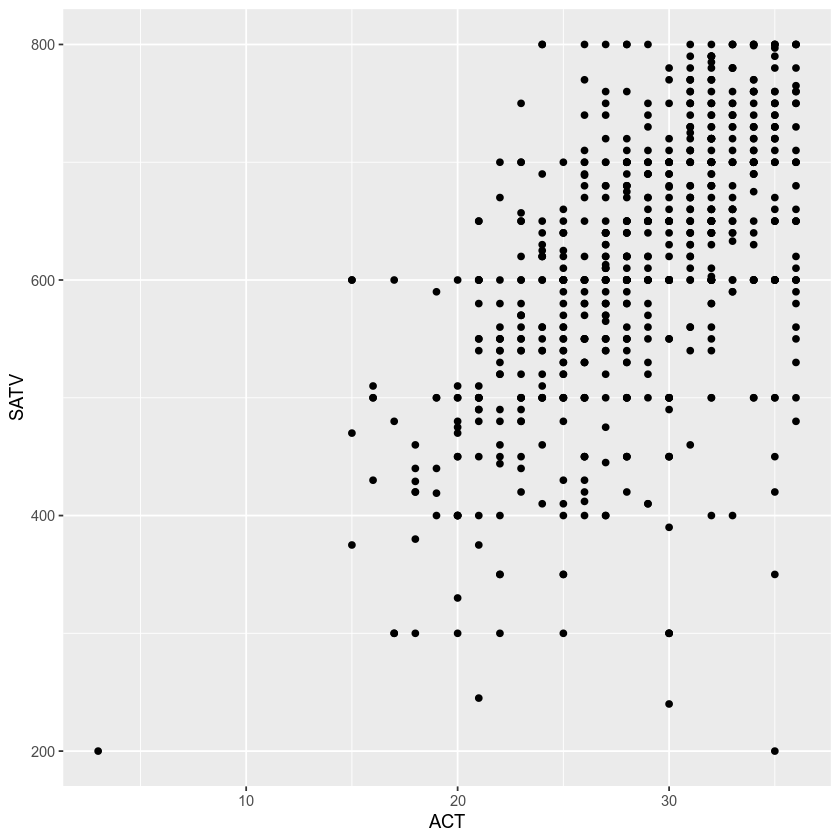

In [153]:
my.plot + geom_point()

my.plot.points<-my.plot + geom_point()
my.plot.points

This is very useful when one, for example, wants to add different geometries to the sample plot. For example, what if we want to add a line to 

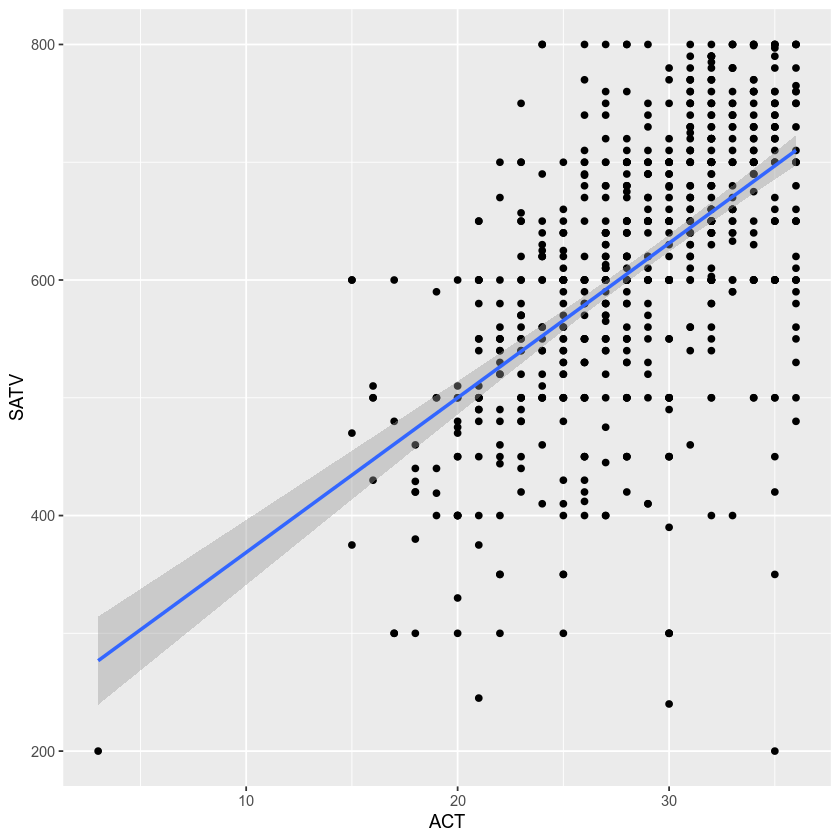

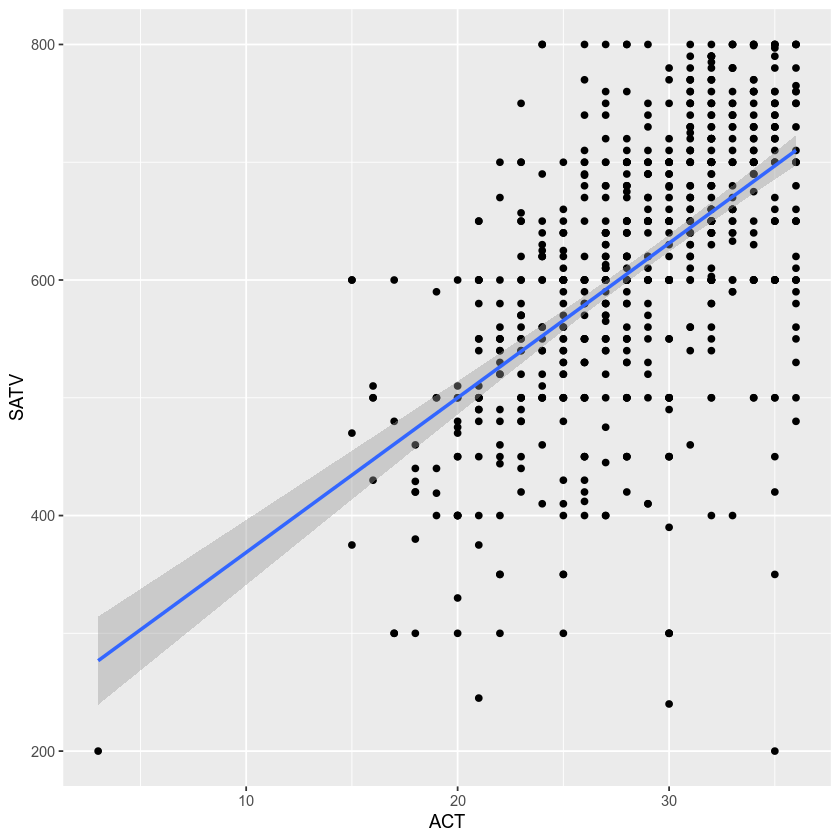

In [154]:
my.plot.points + geom_smooth(method='lm')
my.plot.points.line<- my.plot.points + geom_smooth(method='lm')
my.plot.points.line